Intelligent enhancement of image spatial resolution
Performance shall be compared with the usual cv2 resizing

In [24]:
import os
import cv2
# from skimage.transform import resize, rescale
import numpy as np
import re 
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array
from time import time
import math

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

SIZE = 256

In [25]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

def get_images_in_order(path):
    images = []
    files = os.listdir(path)
    files = sorted_alphanumeric(files)
    print(files)

    for i in files:       
        img = cv2.imread(path + '/'+i,1)
    # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        images.append(img_to_array(img))

    return images

In [26]:

high_img = []
path = 'E:\education\ComputerVision\cv_curs_work\dataset\Raw Data'
high_path = path + '\high_res'
low_path = path + '\low_res'

high_img = get_images_in_order(high_path)
low_img = get_images_in_order(low_path)

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png'

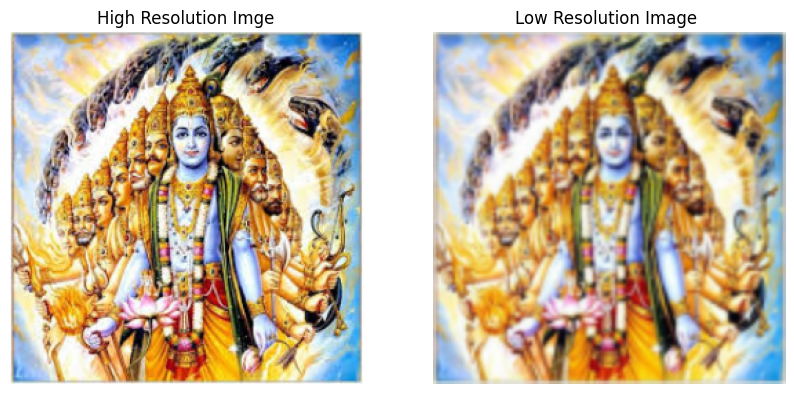

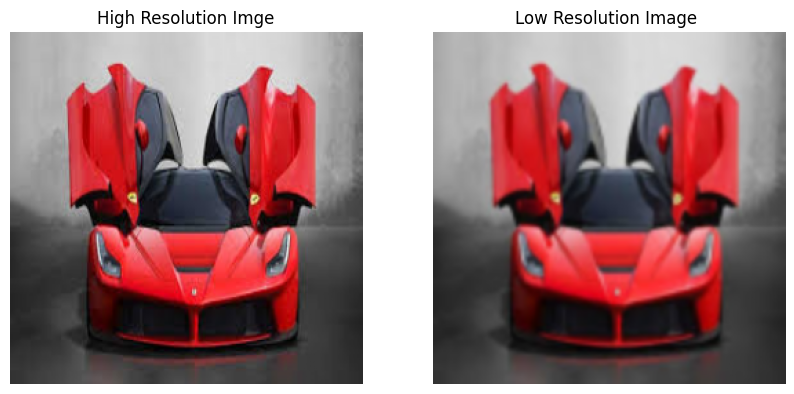

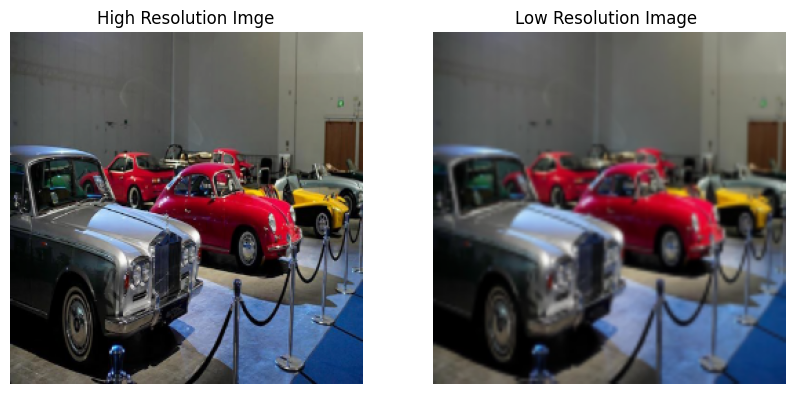

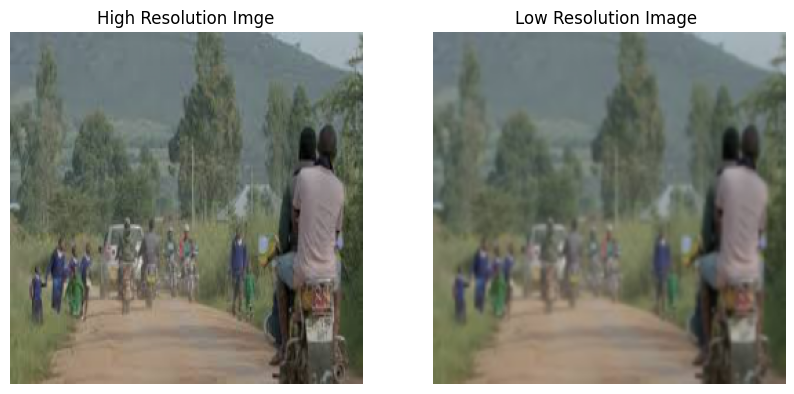

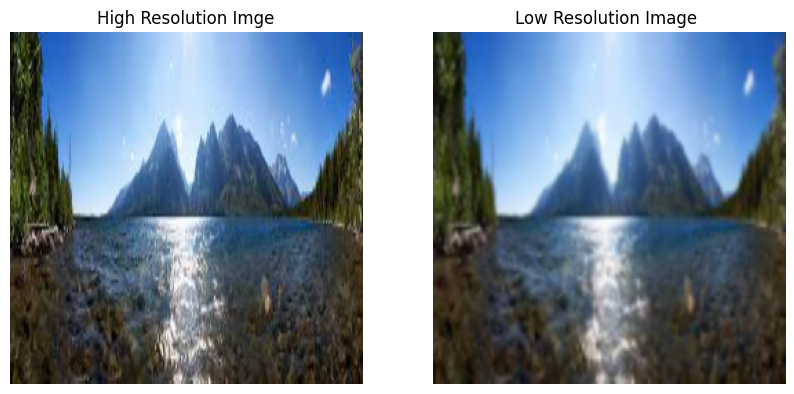

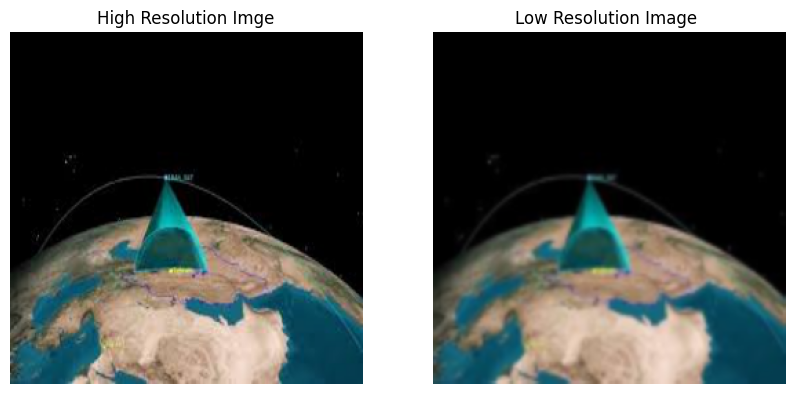

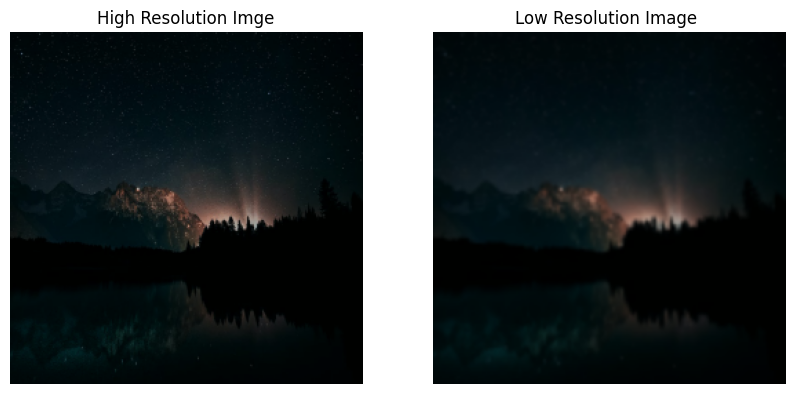

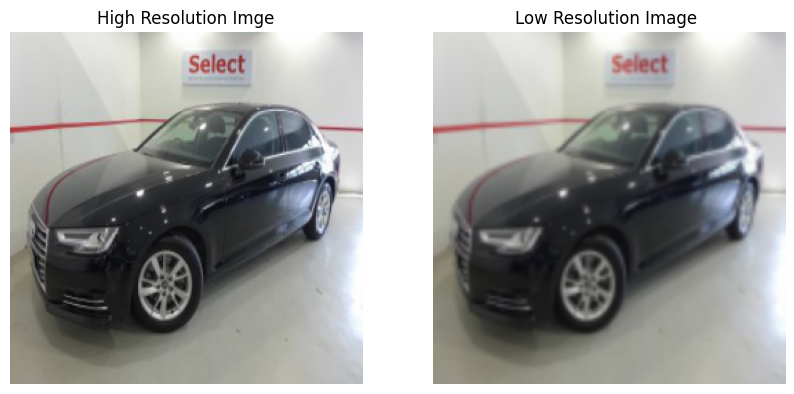

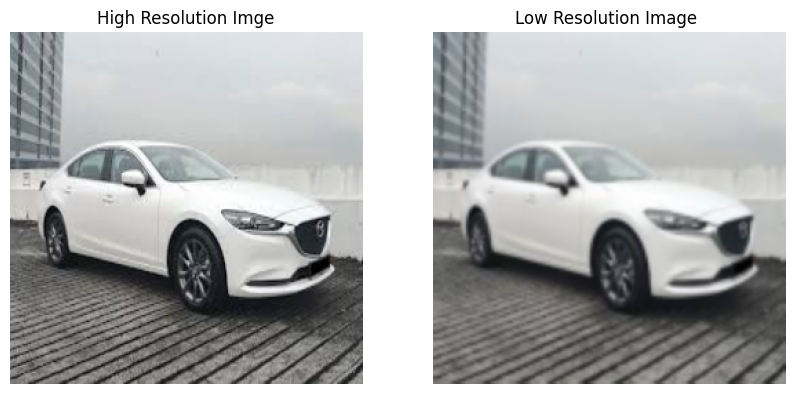

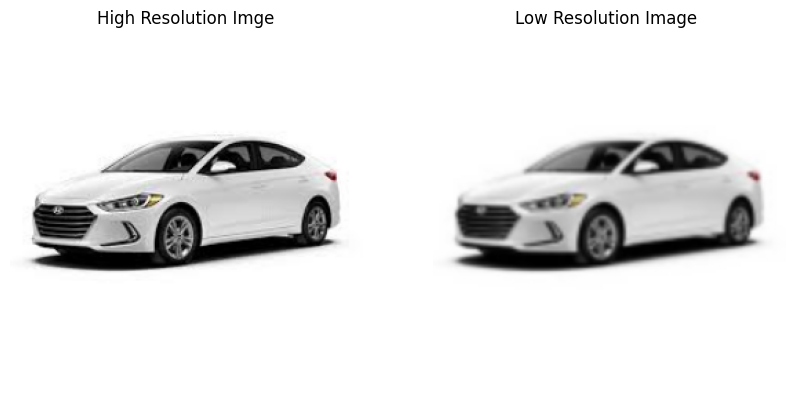

In [34]:
for i in range(10):
    a = np.random.randint(0,855)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge')
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('Low Resolution Image ')
    plt.imshow(low_img[a])
    plt.axis('off')

In [ ]:
def psnr(target, ref):
    diff = target - ref
    diff = diff.flatten('C')
    rmse = math.sqrt(np.mean(diff ** 2))

    return 20* math.log10(255. / rmse)